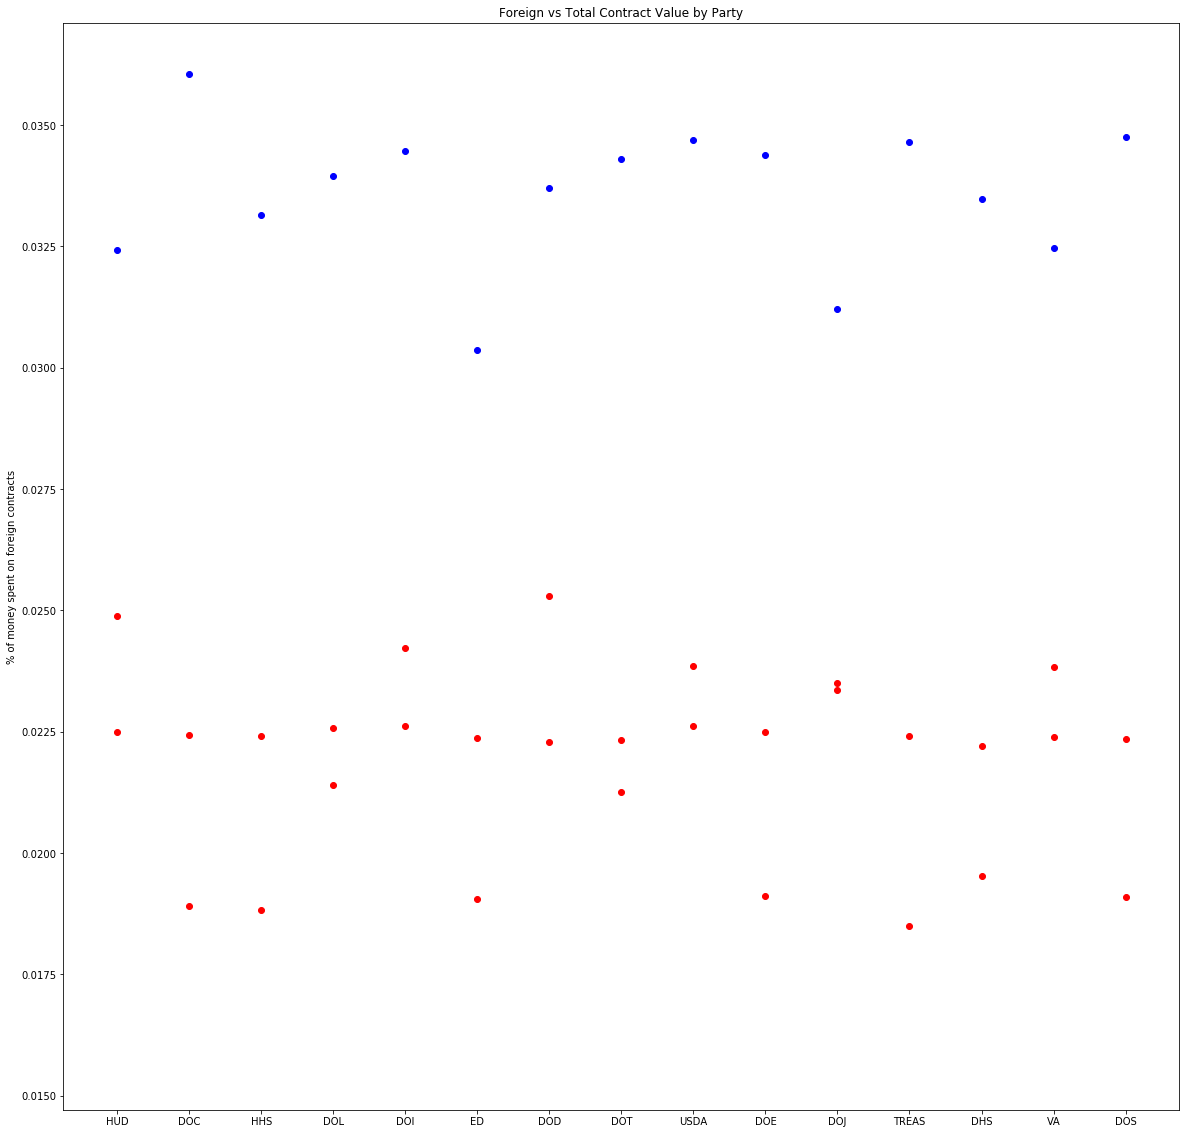

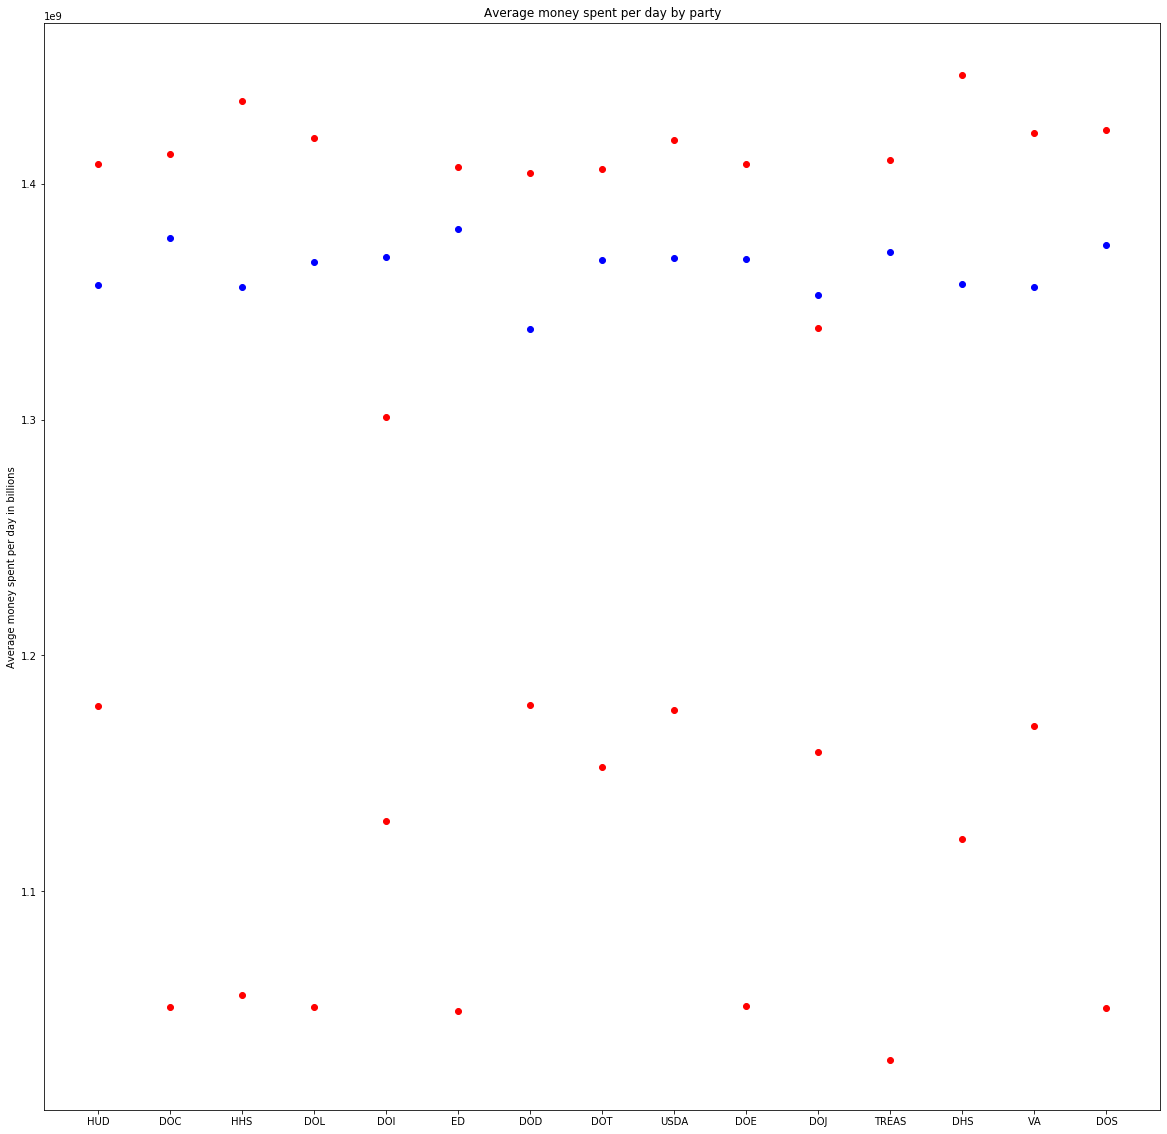

In [61]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]


fileName = 'cabinet_member_spending.csv'
deptSet = set()
presList = ['George W. Bush', 'Barack Obama', 'Donald Trump']
df = pd.read_csv(fileName,header=0)
percentAsForeign = []
for index, row in df.iterrows():
    percentAsForeign.append(row[7]/(row[6] + row[7]))
df['percentAsForeign'] = percentAsForeign
for _,row in df.iterrows():
    deptSet.add(row.Department)
spendingByDeptPresBreakdown = {dept: [] for dept in deptSet}
#compare percentage spent foreign by department with breakdown by party
for dept in deptSet:
    deptDF = df[df.Department == dept]
    byDeptPresSpending  = []
    for pres in presList: #get DF for each president, average their daily amount, plot
        presDF = deptDF[deptDF.President == pres]
        byDeptPresSpending.append(presDF.percentAsForeign.mean())#mean spent
    spendingByDeptPresBreakdown[dept] = byDeptPresSpending

for pres in range(len(presList)):
    color = 0
    if pres == 0 or pres == 2:
        color = 'red'
    else:
        color = 'blue'
    plt.scatter([deptName.split("(")[1].split(")")[0] for deptName in spendingByDeptPresBreakdown], 
            [spendingByDeptPresBreakdown[deptName][pres] for deptName in spendingByDeptPresBreakdown],
               c = color)
plt.ylabel('% of money spent on foreign contracts')
plt.title('Foreign vs Total Contract Value by Party')
plt.show()

fileName = 'Result_4.csv'
deptSet = set()
presList = ['George W. Bush', 'Barack Obama', 'Donald Trump']
df = pd.read_csv(fileName,header=0)
moneyPerDay = []
for index, row in df.iterrows():
    moneyPerDay.append(row[6]/row[5])
df['moneyPerDay'] = moneyPerDay
for _,row in df.iterrows():
    deptSet.add(row.Department)
spendingByDeptPresBreakdown = {dept: [] for dept in deptSet}
#compare money/day spent by department with breakdown by party
for dept in deptSet:
    deptDF = df[df.Department == dept]
    byDeptPresSpending  = []
    for pres in presList: #get DF for each president, average their daily amount, plot
        presDF = deptDF[deptDF.President == pres]
        byDeptPresSpending.append(presDF.moneyPerDay.mean())#mean spent
    spendingByDeptPresBreakdown[dept] = byDeptPresSpending

for pres in range(len(presList)):
    color = 0
    if pres == 0 or pres == 2:
        color = 'red'
    else:
        color = 'blue'
    plt.scatter([deptName.split("(")[1].split(")")[0] for deptName in spendingByDeptPresBreakdown], 
            [spendingByDeptPresBreakdown[deptName][pres] for deptName in spendingByDeptPresBreakdown],
               c = color)
plt.ylabel("Average money spent per day in billions")
plt.title("Average money spent per day by party")
plt.show()
    